# Execute the code below

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

,genre,duration_ms,speechiness
0,Country,200013,0.0444
1,Country,208187,0.0569
2,Country,123360,0.0960
3,Country,238600,0.0368
4,Country,243000,0.0330
...,...,...,...
17915,Country,179147,0.0322
17916,Country,230400,0.0832
17917,Country,216093,0.0268
17918,Country,179947,0.0909


In [2]:
df_zoom['genre'].unique()

array(['Country', 'Classical'], dtype=object)

# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis
- 'speechiness' on Y axis
- 'genre' in hue

<Axes: xlabel='duration_ms', ylabel='speechiness'>

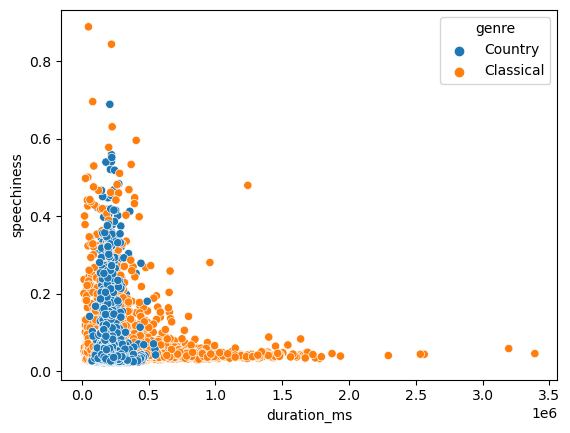

In [3]:
# Your code here :
sns.scatterplot(df_zoom, x = 'duration_ms', y = 'speechiness', hue = 'genre')

## Classification
From df_zoom :
- define X (`duration_ms` and `speechiness`)
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score

In [5]:
df_zoom['genre_encoded'] = LabelEncoder().fit_transform(df_zoom['genre'])

In [6]:
# Your code here :
"""
regression logistique
sépéaration du jeu de données en deux datasets
entrainement des jeux de données
affichage des scores train et test

"""


X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

modelLR = LogisticRegression().fit(X_train,y_train)

train_score_LR = modelLR.score(X_train,y_train)
test_score_LR = modelLR.score(X_test, y_test)

print('test_score_LR :', round(test_score_LR, 5))

test_score_LR : 0.50982


In [7]:
""" KNN """

modelKN =  KNeighborsClassifier().fit(X_train,y_train)

train_score_KN = modelKN.score(X_train,y_train)
test_score_KN = modelKN.score(X_test, y_test)

print('test_score_KN :', test_score_KN)

test_score_KN : 0.7127232142857143


In [17]:
""" decision tree """

from sklearn.preprocessing import LabelEncoder

modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

train_score_DTR = modelDTR.score(X_train,y_train)
test_score_DTR = modelDTR.score(X_test, y_test)

score = modelDTR.score(X,y)
print(train_score_DTR, test_score_DTR, score)

0.9995529427543197 -0.0521916938614706 0.7364311018641997



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# Your code here :
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
""" logistic regression """

modelLR = LogisticRegression().fit(X_train_scaled,y_train)
train_score_LR = modelLR.score(X_train_scaled,y_train)
test_score_LR = modelLR.score(X_test_scaled, y_test)

print('test_score_LR :', test_score_LR)

test_score_LR : 0.6694196428571428


In [12]:
""" KNN """

modelKN =  KNeighborsClassifier().fit(X_train_scaled,y_train)
train_score_KN = modelKN.score(X_train_scaled,y_train)
test_score_KN = modelKN.score(X_test_scaled, y_test)

print('test_score_KN :', test_score_KN)

test_score_KN : 0.7796875


In [13]:
modelDTR.fit(X_train_scaled, y_train)

train_score_DTR = modelDTR.score(X_train_scaled,y_train)
test_score_DTR = modelDTR.score(X_test_scaled, y_test)

score = modelDTR.score(X,y)
score

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


-0.9344772794926861

# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.